# Statistik-Labor Testat Aufgabe 2
***Hinweise:***
- Bitte überprüfen Sie Ihre Resultate vor der Abgabe Ihre Ergebnisse mit den Teilergebnissen aus der Datei ***Teilergebnisse_xy.txt***.
- Die Unterlagen sind im **pdf-Format** in Moodle hochgeladen abzugeben. Richtige Lösungen werden nicht mehr an Sie zurückgegeben. Eine Abgabe per Email ist nicht möglich.
- Bitte füllen Sie das jeweilige **Deckblatt** mit aus und geben es mit Ihrer Lösung zusammen ab.

***Aufgabenstellung:***<br>
Untersuchen Sie die Bevölkerungsentwicklung der USA. <br>
In der Datei **sr_aufg_2_xy.txt** im Unterverzeichnis **Endziffer_xy** (*„xy“ steht für die beiden Endziffern Ihrer Matrikelnummer*) finden Sie die dafür erforderlichen Daten. <br>
Diese Datei enthält zwei Spalten fester Breite: Jahreszahl und Anzahl der Einwohner der USA in Millionen (zu einem festen Stichtag in dem angegebenen Jahr).

## a) Daten einlesen
Lesen Sie Daten in **Python** bzw. ein **Jupyter Notebook** ein. Speichern Sie sie in einem **Pandas DataFrame** ab.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('sr_aufg_2_96.txt', sep='\s+', decimal=',', header=None, names=['Jahr', 'Einwohner'])

## b) Streudiagramm erstellen
Stellen Sie die Bevölkerungsentwicklung in einem Streudiagramm dar.

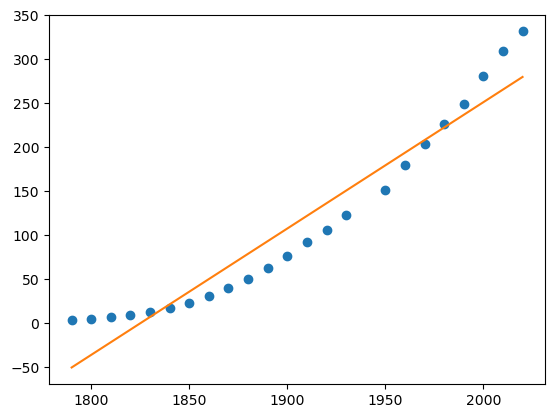

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x = data['Jahr']
y = data['Einwohner']


plt.plot(x, y, 'o')
#Erhaltung der Steigung 'm' und den Achsenabschnitt 'b'
m, b = np.polyfit(x, y, 1)
#Regressionslinie
plt.plot(x, m*x+b)

## c) Regressionskurven bestimmen
Untersuchen Sie je nach Matrikelnummer Ihre 5 Funktionen um eine Regressionskurve durch die Punkte zu legen:<br>

| Gerade Matrikelnummer-Endung: | Ungerade Matrikelnummer-Endung: |
| :- | :- |
| Lineare Funktion: $\;\;$ $y = ax+b$ | Lineare Funktion: $\;\;$ $y = ax+b$ |
| Polynom 2. Grades: $y = ax^2+bx+c$ | Polynom 2. Grades: $y = ax^2+bx+c$ |
| Polynom 4. Grades: $y=ax^4+bx^3+cx^2+dx+e$ | Polynom 3. Grades: $y=ax^3+bx^2+cx+d$ |
| Polynom 6. Grades: $y=ax^6+bx^5+cx^4+dx^3+gx^2+ux+v$ | Polynom 6. Grades: $y=ax^6+bx^5+cx^4+dx^3+gx^2+ux+v$ |
| Exponentialfunktion: $y=a \cdot{\rm e}^{bx}$ | Logarithmusfunktion: $y=a \cdot\ln{(x)}-b$ |

Stellen Sie **in einer Tabelle den Regressionstyp** (z.B. lineare Funktion, Polynom 2. Grades, …), die **geschätzten Koeffizienten mit Achsenabschnitt und das Bestimmtheitsmaß** dar.

***Tipp:***<br>
Verwenden Sie für die Schätzung der Regressionskurve und des Bestimmtheitsmaßes standardisierte Eingangswerte (Jahreszahlen)

In [3]:
#Lineare Funktion
#Array reshaped in 2D
x = data['Jahr'].to_numpy().reshape(-1, 1) 
x_scaled = StandardScaler().fit_transform(x) #Lineare Regression
linear_regressor = LinearRegression() 
linear_regressor.fit(x, data['Einwohner'])
l_ = linear_regressor.score(x, data['Einwohner'])

In [4]:
deg_2 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_scaled) 
poly_regressor_2 = LinearRegression()
poly_regressor_2.fit(deg_2, data['Einwohner'])
Grad_2 = poly_regressor_2.score(deg_2, data['Einwohner'])

In [5]:
deg_4 = PolynomialFeatures(degree=4, include_bias=False).fit_transform(x_scaled)
poly_regressor_4 = LinearRegression()
poly_regressor_4.fit(deg_4, data['Einwohner'])
Grad_4 = poly_regressor_4.score(deg_4, data['Einwohner'])

In [6]:
deg_6 = PolynomialFeatures(degree= 6, include_bias=False).fit_transform(x_scaled) 
poly_regressor_6 = LinearRegression()
poly_regressor_6.fit(deg_6, data['Einwohner'])
Grad_6 = poly_regressor_6.score(deg_6, data['Einwohner'])

In [7]:
from scipy.optimize import curve_fit
def f_exp(x, a, b):
    return a*np.exp(x*b)

jahr_scaled = (data['Jahr']-np.mean(data['Jahr']))/np.std(data['Jahr'])

curve_fit(f_exp, jahr_scaled, data['Einwohner'])  

coefs_exp, cov_exp = curve_fit(f_exp, jahr_scaled, data['Einwohner'])
coefs_exp 

y_mean = np.mean(data['Einwohner'])

exp_predict = f_exp(jahr_scaled, *coefs_exp) 

sumsquared_e = np.sum((exp_predict-y_mean)**2)
sumsquared_t = np.sum((data['Einwohner']-y_mean)**2)

r_squared_exp = sumsquared_e/sumsquared_t
r_squared_exp.round(4)

0.9116

In [8]:
linear = {
0: 'a1 = %.2f, a0 = %.2f' % (linear_regressor.coef_, linear_regressor.intercept_), 
1: '%.4f' % (l_)
}


poly_2 = {
0: 'a2 = %.2f, a1 = %.2f, a0 = %.2f' % (poly_regressor_2.coef_[1], 
                                        poly_regressor_2.coef_[0], 
                                        poly_regressor_2.intercept_),
1: '%.4f' % (Grad_2) }

poly_4 = {
0: 'a4 = %.2f, a3 = %.2f, a2 = %.2f, a1 = %.2f, a0 = %.2f' % (poly_regressor_4.coef_[3],
                                                              poly_regressor_4.coef_[2], 
                                                              poly_regressor_4.coef_[1], 
                                                              poly_regressor_4.coef_[0], 
                                                              poly_regressor_4.intercept_),
1: '%.4f' % (Grad_4) }
poly_6 = {
0: 'a6=%.2f, a5=%.2f, a4=%.2f, a3=%.2f, a2=%.2f, a1=%.2f, a0=%.2f' % (poly_regressor_6.coef_[5],
                                                                      poly_regressor_6.coef_[4], 
                                                                      poly_regressor_6.coef_[3], 
                                                                      poly_regressor_6.coef_[2],
                                                                      poly_regressor_6.coef_[1], 
                                                                      poly_regressor_6.coef_[0], 
                                                                      poly_regressor_6.intercept_),
1: '%.4f' % (Grad_6) }
exp = {
0: 'a=%.2f, b=%.2f' % (coefs_exp[0], coefs_exp[1]), 
    1: '%.4f' % (r_squared_exp)
}
dat = [ linear.values(), poly_2.values(), poly_4.values(), poly_6.values(), exp.values(),
]
dataf = pd.DataFrame(dat,
columns=['Koeffizienten', 'Bestimmtheitsmaß'], index=['Linear', 
                                                      'Polynom 2',
                                                      'Polynom 4',
                                                      'Polynom 6',
                                                      'Exponentialfunktion', ])
dataf

,Koeffizienten,Bestimmtheitsmaß
Linear,"a1 = 1.43, a0 = -2617.43",0.9255
Polynom 2,"a2 = 32.80, a1 = 98.90, a0 = 79.91",0.9995
Polynom 4,"a4 = -0.03, a3 = 0.74, a2 = 32.86, a1 = 97.60,...",0.9995
Polynom 6,"a6=-3.21, a5=-0.45, a4=12.53, a3=2.51, a2=20.9...",0.9997
Exponentialfunktion,"a=78.35, b=0.92",0.9116


## d) Beste Kurve wählen
Wählen Sie aus den von Ihnen untersuchten Möglichkeiten die am besten geeignete Kurve. **Erläutern** Sie Ihre Wahl.

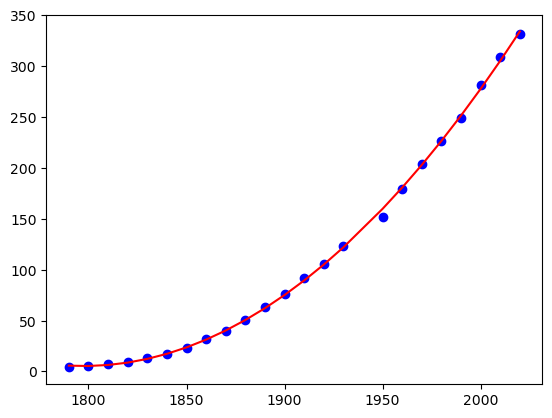

In [9]:
#Ich habe das Polynom 2 Grades gewählt da alles Bestimmtheitsmaße ungefähr gleich sind
deg_2_pred = poly_regressor_2.predict(deg_2) 
plt.scatter(data['Jahr'], data['Einwohner'], color='blue') 
plt.plot(x, deg_2_pred, color='red')
plt.show()

## e) Streudiagramm mit Regressionskurve
Zeichnen Sie in das Streudiagramm die optimale Regressionskurve aus 4) ein. Dabei sollen auf der x-Achse die Jahreszahlen und auf der y-Achse die Bevölkerungszahl angegeben sein.

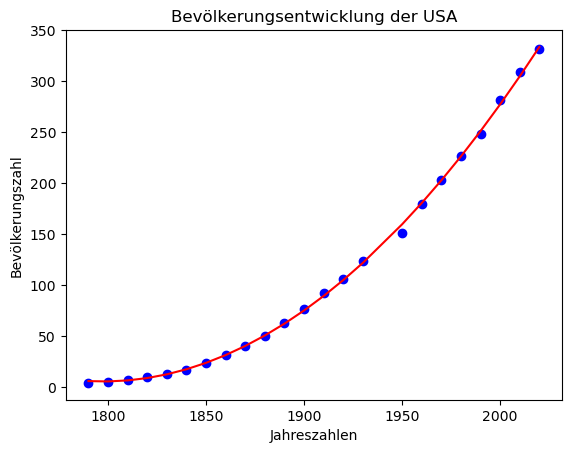

In [10]:
deg_2_pred = poly_regressor_2.predict(deg_2) 
plt.scatter(data['Jahr'], data['Einwohner'], color='blue') 
plt.xlabel('Jahreszahlen')
plt.ylabel('Bevölkerungszahl')
plt.title('Bevölkerungsentwicklung der USA') 
plt.plot(x, deg_2_pred, color='red') 
plt.show()

## f) Prognose für das Jahr 2030
Berechnen Sie aus den Ihnen vorgelegten Daten eine Prognose über die Bevölkerungszahl der USA im Jahr 2030. **Erläutern** Sie Ihr Vorgehen.

***Tipp:***<br>
Beim Wert für die Prognose sollten Sie überlegen, ob Ihr Wert stimmen kann oder ob er nicht vielleicht völlig unrealistisch ist. <br>
Der Grund für unrealistische Werte ist dabei evtl. gar nicht in der Wahl der Regressionsvariante zu suchen, sondern evtl. darin, dass numerische Probleme vorliegen und die geschätzten Koeffizienten mit zu wenigen Nachkommastellen verwendet werden!

In [11]:
def calculate_2030_poly_2(x, a0, a1, a2): return a0 + a1 * x + a2 * x**2
# polynomial 2
poly_2_2030 = calculate_2030_poly_2((2030-np.mean(data['Jahr']))/np.std(data['Jahr']), poly_regressor_2.intercept_, *poly_regressor_2.coef_)
print("{:.4f}".format(poly_2_2030))

364.0423
